In this project, we will use Convolutional Neural Network to build train and test a traffic sign classification model. We will build this model using tensorflow and keras. It is a multiclass classification problem. This model can be used to make smarter cars.

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"iwhitedevil","key":"3862359c7ccc56addf84ac96b510a938"}'}

We will start by connecting to Kaggle using Kaggle API which can be downloaded from your Kaggle account's settings and uploading it here(upload box).

In [ ]:
!pip install -q kaggle

Installing kaggle api using pip

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

Setting up Kaggle using Kaggle API.

In [ ]:
!mkdir Traffic_sign_dataset
%cd Traffic_sign_dataset

mkdir: cannot create directory ‘Traffic_sign_dataset’: File exists
/content/Traffic_sign_dataset


To store the data we will create a new directory and make it as current working directory.

In [ ]:
!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34          88698        995  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11          11639        263  1.0              
ibrahimkaratas/gtsrb-german-traffic-sign-recognition-benchmark     GTSRB German Traffic Sign Recognition Benchmark    231MB  2023-01-08 16:48:07             44          9  0.4375           
eunjurho/german-traffic-sign-recognition-benchmark

Searching Kaggle for the required dataset using search option(-s) with title 'dogbreedidfromcomp'. We can also use different search options like searching competitions, notebooks, kernels, datasets, etc.

In [ ]:
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
%cd ..

 99% 606M/612M [00:08<00:00, 106MB/s]
100% 612M/612M [00:08<00:00, 73.6MB/s]
/content


After searching the data next step would be downloading the data into collab notebook using references found in search option.

In [ ]:
!unzip Traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d Traffic_sign_dataset
!rm Traffic_sign_dataset/gtsrb-german-traffic-sign.zip

In [ ]:
!rm -rf Traffic_sign_dataset/Meta
!rm -rf Traffic_sign_dataset/meta
!rm -rf Traffic_sign_dataset/test
!rm -rf Traffic_sign_dataset/train
!rm Traffic_sign_dataset/Meta.csv

We will unzip the data which is downloaded and remove the irrelevant files.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow as tf

In [ ]:
import os
import random

Importing required libraries.

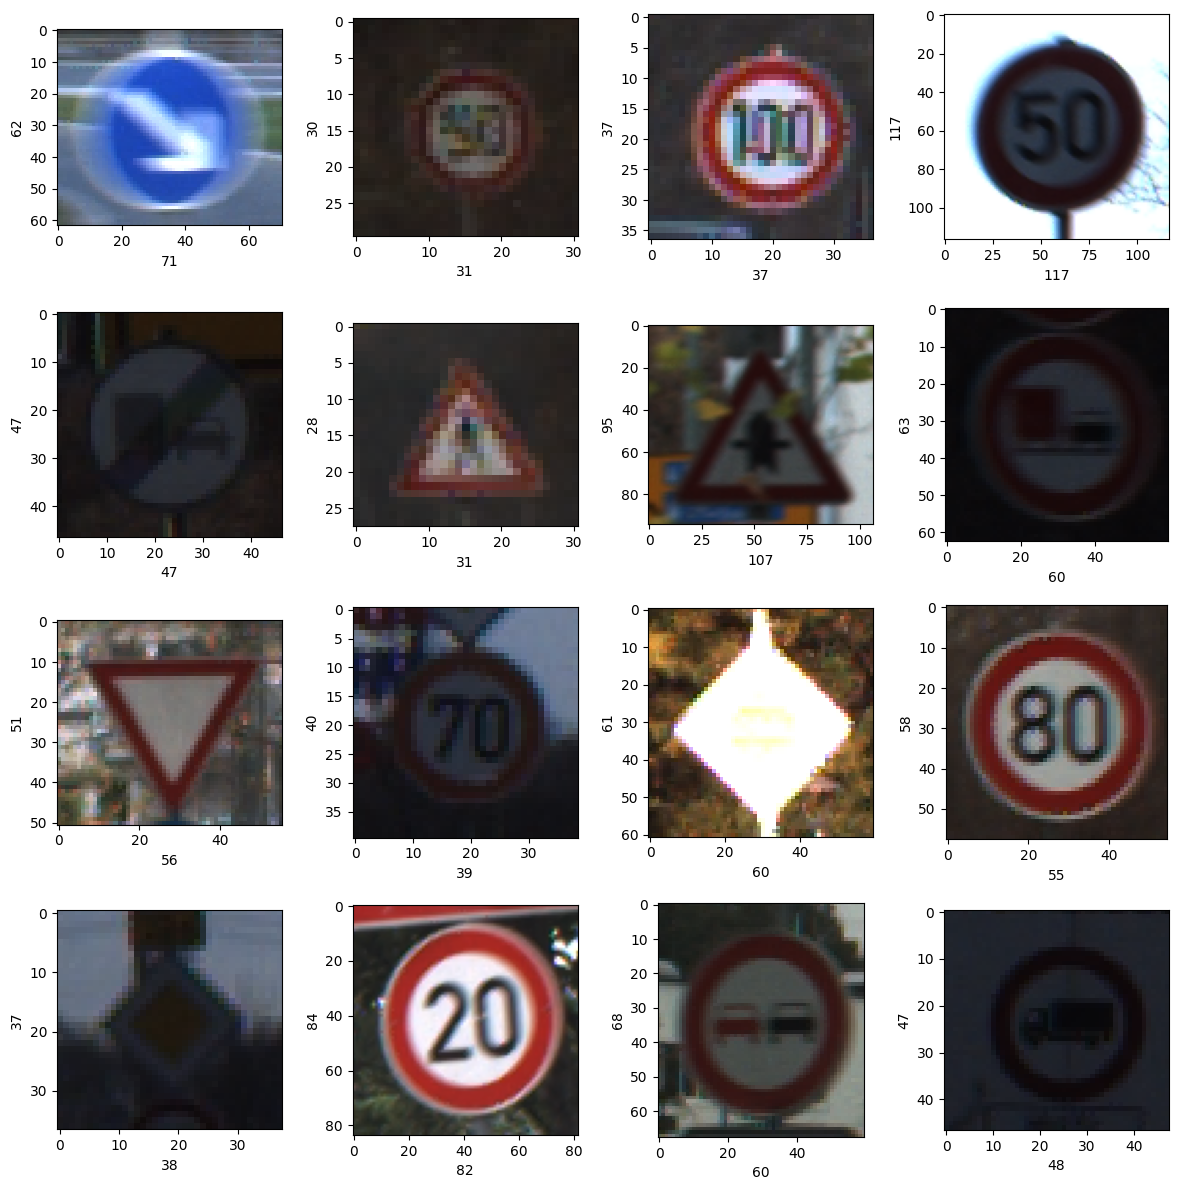

In [ ]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "Traffic_sign_dataset/Test"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = plt.imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

Visualizing some images of traffic sign from the test dataset. we can see here that the dimension of images are uneven.

In [ ]:
dim1 = []
dim2 = []

for i in range(0,43):
  labels = 'Traffic_sign_dataset/Train'+'/{0}'.format(i)
  img_path = os.listdir(labels)
  for x in img_path:
    image = plt.imread(labels + '/' + x)
    dim1.append(image.shape[0])
    dim2.append(image.shape[1])

For further processing we will require the images of same dimension. So, we will start storing the dimension of all the images from training dataset from all 43 classes.  

In [ ]:
print('Dimention of 1 Mean :',np.mean(dim1),'Dimention of 2 Mean : ',np.mean(dim2))

Dimention of 1 Mean : 50.328929582493814 Dimention of 2 Mean :  50.83587951745773


Now we will find out the mean value of both the dimensions and analyse them. Here, we can see that (50,50) is the average shape for all the images.

In [ ]:
images = []
lab_id = []

for i in range(0,43):
  labels = 'Traffic_sign_dataset/Train' + '/{0}'.format(i)
  img_path = os.listdir(labels)
  for x in img_path:
    img = Image.open(labels + '/' + x)
    img = img.resize((50,50))
    img = np.array(img)
    img = img/255
    images.append(img)
    lab_id.append(i)

Now we will reshape the images into (50,50) and also store their label ids.

In [ ]:
images = np.array(images)
images.shape

(39209, 50, 50, 3)

In [ ]:
lab_id = np.array(lab_id)
lab_id.shape

(39209,)

Storing the label ids into numpy array and printing the shape. Here we can observe that their are 39209 label ids.

Now we will convert all the images into numpy array and normalize them.

In [ ]:
lab_counts = pd.DataFrame(lab_id).value_counts()
lab_counts

2     2250
1     2220
13    2160
12    2100
38    2070
10    2010
4     1980
5     1860
25    1500
9     1470
7     1440
3     1410
8     1410
11    1320
35    1200
18    1200
17    1110
31     780
14     780
33     689
15     630
26     600
28     540
23     510
30     450
16     420
34     420
6      420
36     390
22     390
40     360
20     360
21     330
39     300
29     270
24     270
41     240
42     240
32     240
27     240
37     210
19     210
0      210
dtype: int64

Now we will observe images per class for checking whether the data is balanced or not. From the result we can say that data is balanced.

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(images , lab_id , test_size=0.25,random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(29406, 50, 50, 3) (9803, 50, 50, 3) (29406,) (9803,)


The next step would be to split the data into training and validation with 75% of training data and 25% of validation data.

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

Converting the classes column into categorical using to_categorical() function.

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=(50, 50, 3),activation = 'relu',padding='same'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.5))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(43, activation = 'softmax'))

Defining the model architecture. In this we will define all the layers with their input shape kernel size, activation, etc.

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 25, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0

Compiling the model using metrics, optimizer and loss as required and printing out the summary of the model.

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(29406, 50, 50, 3) (9803, 50, 50, 3) (29406, 43) (9803, 43)


In [ ]:
model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_test, y_test))

Epoch 1/10
230/230 [==============================] - 168s 724ms/step - loss: 2.9210 - accuracy: 0.2036 - val_loss: 1.9834 - val_accuracy: 0.4287
Epoch 2/10
230/230 [==============================] - 166s 722ms/step - loss: 1.7734 - accuracy: 0.4426 - val_loss: 1.1480 - val_accuracy: 0.6751
Epoch 3/10
230/230 [==============================] - 166s 721ms/step - loss: 1.2066 - accuracy: 0.6066 - val_loss: 0.6631 - val_accuracy: 0.8456
Epoch 4/10
230/230 [==============================] - 166s 723ms/step - loss: 0.8527 - accuracy: 0.7185 - val_loss: 0.3648 - val_accuracy: 0.9228
Epoch 5/10
230/230 [==============================] - 165s 718ms/step - loss: 0.6391 - accuracy: 0.7868 - val_loss: 0.2227 - val_accuracy: 0.9507
Epoch 6/10
230/230 [==============================] - 164s 713ms/step - loss: 0.5073 - accuracy: 0.8309 - val_loss: 0.1696 - val_accuracy: 0.9659
Epoch 7/10
230/230 [==============================] - 161s 699ms/step - loss: 0.4216 - accuracy: 0.8580 - val_loss: 0.1301 -

Now we will fit the model and observe how our is getting trained on each epoch.

<Axes: >

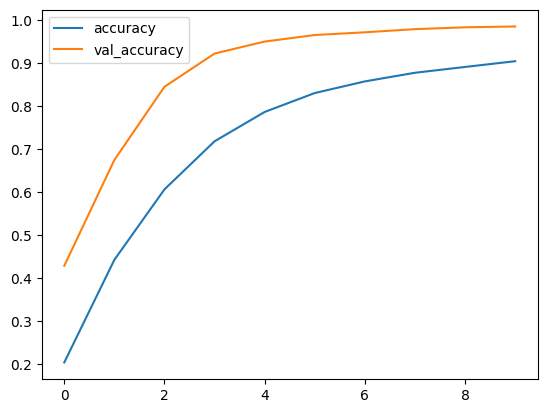

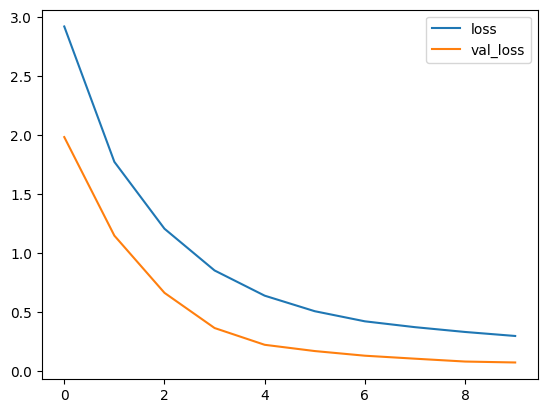

In [ ]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

Next we will visualize the accuracy and loss per epoch. For this we will store the model history in the pandas dataframe and plot them.

In [ ]:
test_path = 'Traffic_sign_dataset/Test'
!rm Traffic_sign_dataset/Test/GT-final_test.csv

Creating the variable which has path of test dataset. As we downloded the dataset we found out that their is a GT-final_test.csv file in the test images folder which cannot be processed. So, we will remove that file.

In [ ]:
def scaling(test_images, test_path):
    images = []

    image_path = test_images

    for x in image_path:
        img = Image.open(test_path + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)

    #Converting images into numpy array
    images = np.array(images)
    #The pixel value of each image ranges between 0 and 255
    #Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
    images = images/255

    return images

Next step would we creating a function to resize the test images converting them into a numpy array and normalize them.

In [ ]:
test_images = scaling(sorted(os.listdir(test_path)),test_path)

Calling the above created function on test images.

In [ ]:
test = pd.read_csv('Traffic_sign_dataset/Test.csv')
y_test = test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10])

Next we will read label ids from Test.csv and store the values of the class id in y_test variable.

In [ ]:
y_pred = model.predict(test_images)
y_pred = [np.argmax(i) for i in y_pred]
y_pred

Now we will use the model to make predictions on our test images and save them in y_pred.

In [ ]:
# Storing all lables
all_lables = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vechiles over 3.5 metric']

Storing the labels according to the image classes.

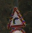

In [ ]:
# Visualize test image
img = Image.open(test_path + '/00017.png')
img

Let's visualize test image

In [ ]:
# Original label
print("Original label : ",all_lables[y_test[17]])

Original label :  Dangerous curve to the right


Finding out original label for the image above.

In [ ]:
# Predicted label
print("Predicted label : ",all_lables[y_pred[17]])

Predicted label :  Dangerous curve to the right


Finding out the predicted label for the image above.

## Conclusion:

We started with downloading the dataset, preprocessing it, created the model and found out the predictions using the model. During preprocessing we found that this dataset has 43 classes. Model reached an accuracy of 95%+ in just 50 epochs, we can further optimize the model using hyper parameter tuning and reach a higher accuracy.

# Scope:

This model can be used in self driving cars which will enable them to automatically recognize traffic signs similarly the driver alert system inside cars will help and protect drivers by understanding the traffic signs around them.